In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words

In [2]:
ayetler = pd.read_csv("ayetler.csv")
sureler = pd.read_csv("sureler.csv")

In [3]:
ayetler.drop("Unnamed: 0",axis=1,inplace=True)
sureler.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
sureler

,sureAd,ayetSayi,inisSira
0,fatiha-suresi,7,5
1,bakara-suresi,286,87
2,aliimran-suresi,200,89
3,nisa-suresi,176,92
4,maide-suresi,120,112
...,...,...,...
109,nasr-suresi,3,114
110,tebbet-suresi,5,6
111,ihlas-suresi,4,22
112,felak-suresi,5,20


In [5]:
ayetler

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
0,abese-suresi,1,عَبَسَ وَتَوَلّٰىۙ,‘Abese ve tevellâ,"1,2. Kendisine o âmâ geldi diye Peygamber yüzü...",(Peygamber) Yüzünü ekşitti ve döndü.,"(The Prophet) frowned and turned away,"
1,abese-suresi,2,اَنْ جَٓاءَهُ الْاَعْمٰىۜ,En câehu-l-a’mâ,"1,2. Kendisine o âmâ geldi diye Peygamber yüzü...","Kendisine âmâ geldi, diye.",Because there came to him the blind man (inter...
2,abese-suresi,3,وَمَا يُدْر۪يكَ لَعَلَّهُ يَزَّكّٰىۙ,Vemâ yudrîke le’allehu yezzekkâ,"(Ey Muhammed!) Ne bilirsin, belki de o arınacak,","Ne bilirsin, belki o temizlenecek?",But what could tell thee but that perchance he...
3,abese-suresi,4,اَوْ يَذَّكَّرُ فَتَنْفَعَهُ الذِّكْرٰىۜ,Ev yeżżekkeru fetenfe’ahu-żżikrâ,Yahut öğüt alacak da bu öğüt kendisine fayda v...,Veya öğüt belleyecek de öğüt ona fayda verecek.,"Or that he might receive admonition, and the t..."
4,abese-suresi,5,اَمَّا مَنِ اسْتَغْنٰىۙ,Emmâ meni-staġnâ,Kendini muhtaç hissetmeyene gelince;,"Ama buna ihtiyaç hissetmeyene gelince,",As to one who regards Himself as selfsufficien...
...,...,...,...,...,...,...,...
6231,zumer-suresi,71,وَس۪يقَ الَّذ۪ينَ كَفَرُٓوا اِلٰى جَهَنَّمَ زُ...,Vesîka-lleżîne keferû ilâ cehenneme zumerâ(an)...,İnkâr edenler grup grup cehenneme sevk edilirl...,İnkâr edenler bölük bölük cehenneme sevkedilme...,The Unbelievers will be led to Hell in crowd: ...
6232,zumer-suresi,72,ق۪يلَ ادْخُلُٓوا اَبْوَابَ جَهَنَّمَ خَالِد۪ين...,Kîle-dḣulû ebvâbe cehenneme ḣâlidîne fîhâ(s) f...,Onlara şöyle denir: “İçinde ebedî kalmak üzere...,"(Onlara): ""Ebedî olarak içinde kalmak üzere gi...","(To them) will be said: ""Enter ye the gates of..."
6233,zumer-suresi,73,وَس۪يقَ الَّذ۪ينَ اتَّقَوْا رَبَّهُمْ اِلَى ال...,Vesîka-lleżîne-ttekav rabbehum ilâ-lcenneti zu...,Rablerine karşı gelmekten sakınanlar da grup g...,Rablerinden korkanlar da bölük bölük cennete s...,And those who feared their Lord will be led to...
6234,zumer-suresi,74,وَقَالُوا الْحَمْدُ لِلّٰهِ الَّذ۪ي صَدَقَنَا ...,Ve kâlû-lhamdu li(A)llâhi-lleżî sadekanâ va’de...,"Onlar şöyle derler: “Hamd, bize olan vaadini g...","Onlar da: ""Hamdolsun o Allah'a ki, bize vaadin...","They will say: ""Praise be to Allah, Who has tr..."


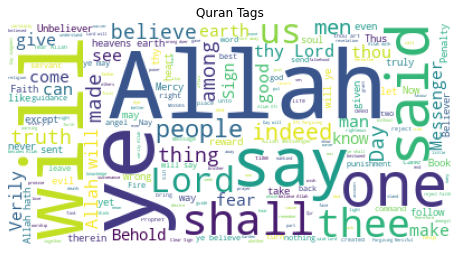

In [6]:
stop_words_en = get_stop_words('en')
stop_words_tr = get_stop_words('tr')

ingilizce = ""
for i in ayetler.ingilizceMeal:
    ingilizce +=i
    
plt.figure(figsize = (8,8))
wordcloud = WordCloud(
    stopwords=stop_words_en,
    background_color='White').generate(ingilizce)
plt.imshow(wordcloud)
plt.title("Quran Tags")
plt.axis('off')
plt.show()

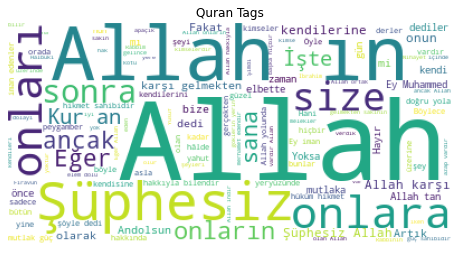

In [7]:
diyanetMeal = ""
for i in ayetler.diyanetMeal:
    diyanetMeal +=i
    
plt.figure(figsize = (8,8))
wordcloud = WordCloud(
    stopwords=stop_words_tr,
    background_color='White').generate(diyanetMeal)
plt.imshow(wordcloud)
plt.title("Quran Tags")
plt.axis('off')
plt.show()

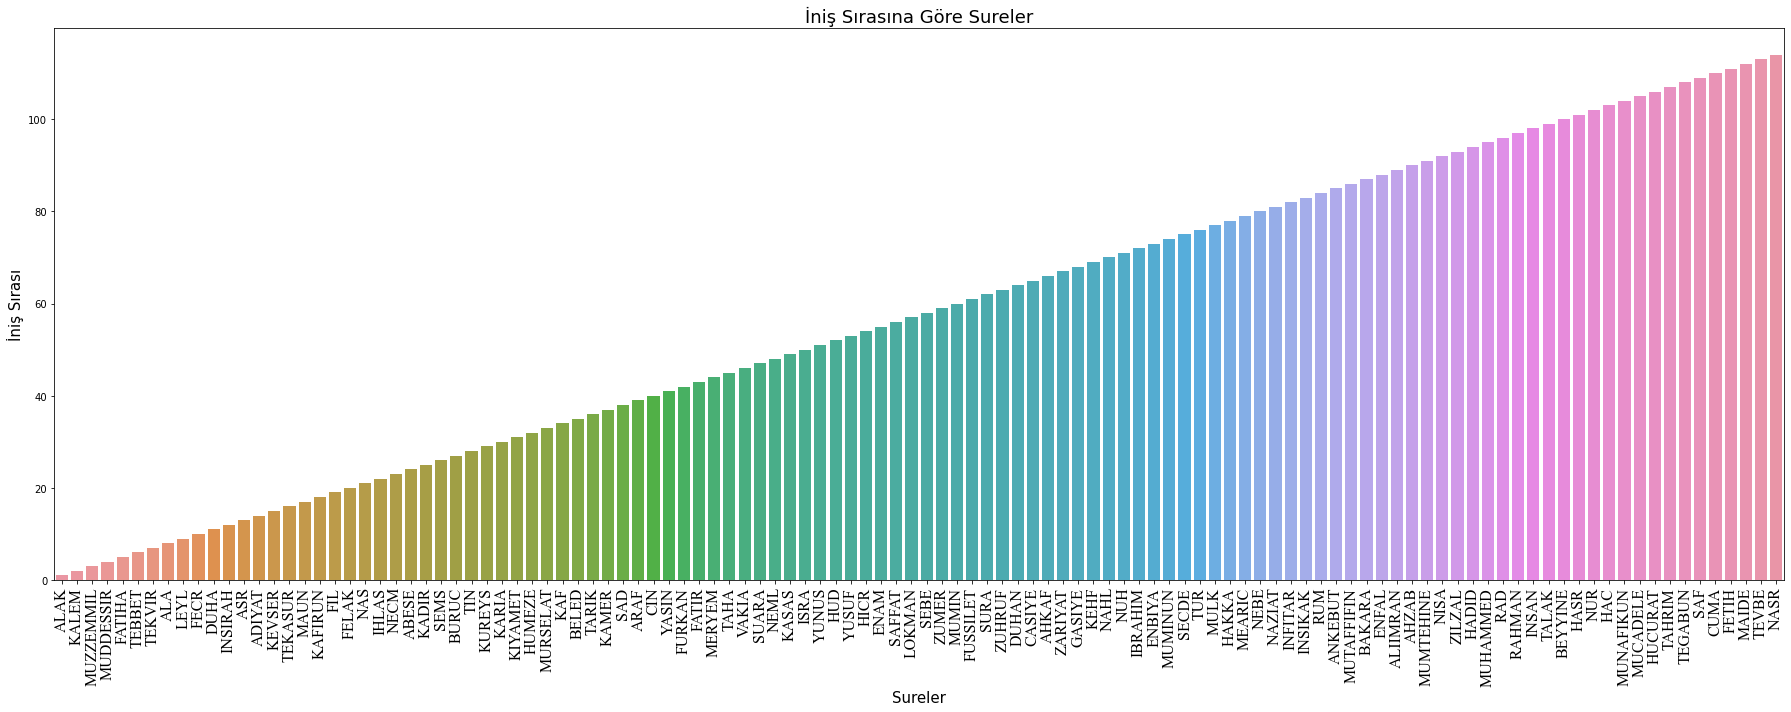

In [8]:
sureler.sureAd=sureler.sureAd.str.replace("-suresi","")
sureler.sureAd=sureler.sureAd.str.upper()
plt.figure(figsize=(25,10))
sns.barplot(x=sureler.sureAd,
            y=sureler.inisSira, 
            data=sureler, 
            order=sureler.sort_values('inisSira').sureAd)
# set labels
plt.xticks(rotation = 90,fontsize=16,fontname = "Times New Roman")
plt.xlabel("Sureler", size=15)
plt.ylabel("İniş Sırası", size=15)
plt.title("İniş Sırasına Göre Sureler", size=18)
plt.tight_layout()

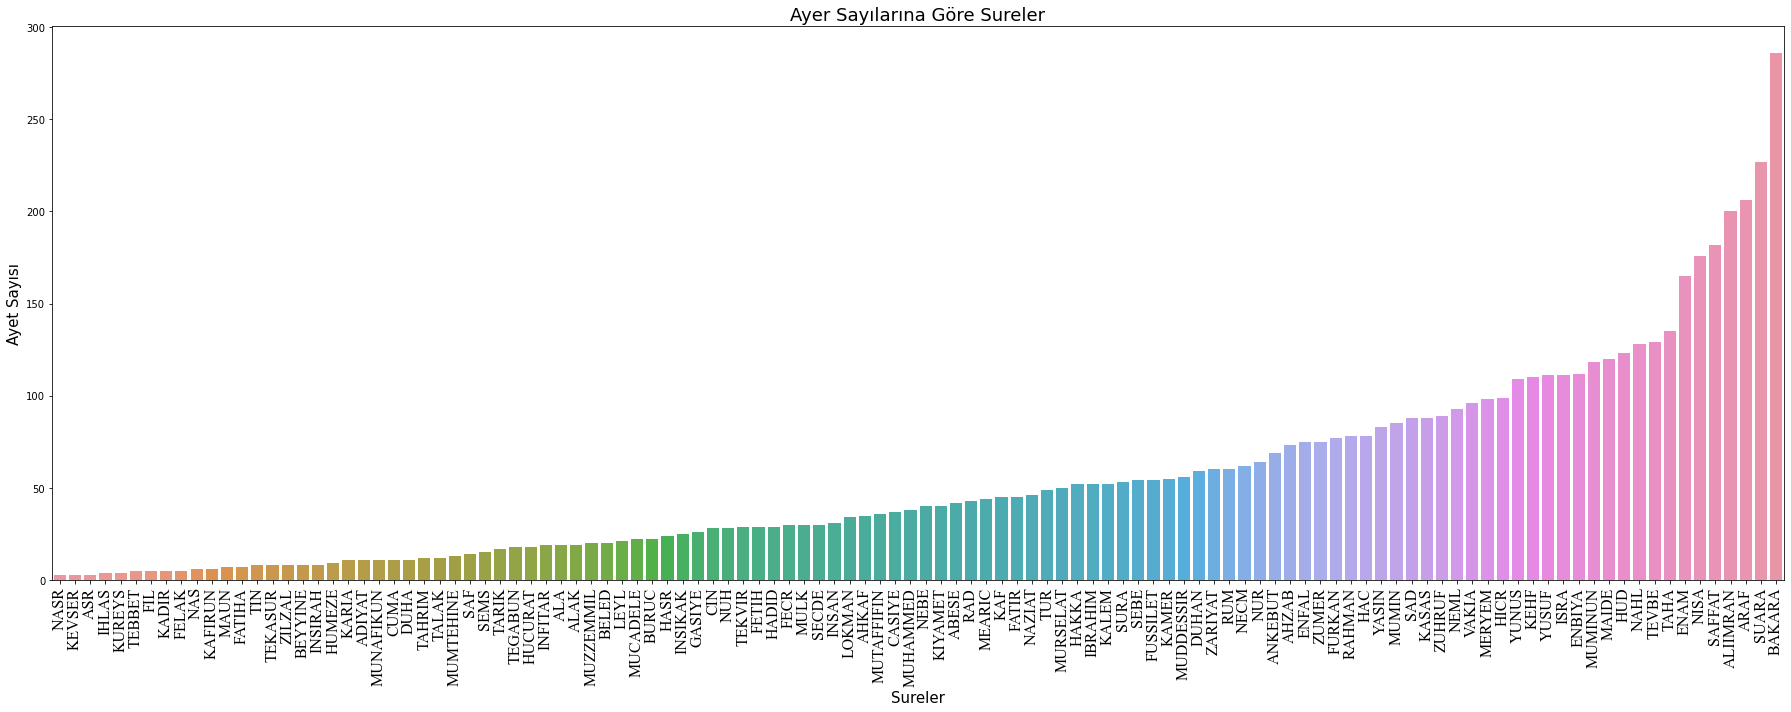

In [9]:
sureler.sureAd=sureler.sureAd.str.replace("-suresi","")
sureler.sureAd=sureler.sureAd.str.upper()
plt.figure(figsize=(25,10))
sns.barplot(x=sureler.sureAd,
            y=sureler.ayetSayi, 
            data=sureler, 
            order=sureler.sort_values('ayetSayi').sureAd)
# set labels
plt.xticks(rotation = 90,fontsize=16,fontname = "Times New Roman")
plt.xlabel("Sureler", size=15)
plt.ylabel("Ayet Sayısı", size=15)
plt.title("Ayer Sayılarına Göre Sureler", size=18)
plt.tight_layout()

In [10]:
ayetler.head()

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
0,abese-suresi,1,عَبَسَ وَتَوَلّٰىۙ,‘Abese ve tevellâ,"1,2. Kendisine o âmâ geldi diye Peygamber yüzü...",(Peygamber) Yüzünü ekşitti ve döndü.,"(The Prophet) frowned and turned away,"
1,abese-suresi,2,اَنْ جَٓاءَهُ الْاَعْمٰىۜ,En câehu-l-a’mâ,"1,2. Kendisine o âmâ geldi diye Peygamber yüzü...","Kendisine âmâ geldi, diye.",Because there came to him the blind man (inter...
2,abese-suresi,3,وَمَا يُدْر۪يكَ لَعَلَّهُ يَزَّكّٰىۙ,Vemâ yudrîke le’allehu yezzekkâ,"(Ey Muhammed!) Ne bilirsin, belki de o arınacak,","Ne bilirsin, belki o temizlenecek?",But what could tell thee but that perchance he...
3,abese-suresi,4,اَوْ يَذَّكَّرُ فَتَنْفَعَهُ الذِّكْرٰىۜ,Ev yeżżekkeru fetenfe’ahu-żżikrâ,Yahut öğüt alacak da bu öğüt kendisine fayda v...,Veya öğüt belleyecek de öğüt ona fayda verecek.,"Or that he might receive admonition, and the t..."
4,abese-suresi,5,اَمَّا مَنِ اسْتَغْنٰىۙ,Emmâ meni-staġnâ,Kendini muhtaç hissetmeyene gelince;,"Ama buna ihtiyaç hissetmeyene gelince,",As to one who regards Himself as selfsufficien...


In [11]:
ayetler.tail()

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
6231,zumer-suresi,71,وَس۪يقَ الَّذ۪ينَ كَفَرُٓوا اِلٰى جَهَنَّمَ زُ...,Vesîka-lleżîne keferû ilâ cehenneme zumerâ(an)...,İnkâr edenler grup grup cehenneme sevk edilirl...,İnkâr edenler bölük bölük cehenneme sevkedilme...,The Unbelievers will be led to Hell in crowd: ...
6232,zumer-suresi,72,ق۪يلَ ادْخُلُٓوا اَبْوَابَ جَهَنَّمَ خَالِد۪ين...,Kîle-dḣulû ebvâbe cehenneme ḣâlidîne fîhâ(s) f...,Onlara şöyle denir: “İçinde ebedî kalmak üzere...,"(Onlara): ""Ebedî olarak içinde kalmak üzere gi...","(To them) will be said: ""Enter ye the gates of..."
6233,zumer-suresi,73,وَس۪يقَ الَّذ۪ينَ اتَّقَوْا رَبَّهُمْ اِلَى ال...,Vesîka-lleżîne-ttekav rabbehum ilâ-lcenneti zu...,Rablerine karşı gelmekten sakınanlar da grup g...,Rablerinden korkanlar da bölük bölük cennete s...,And those who feared their Lord will be led to...
6234,zumer-suresi,74,وَقَالُوا الْحَمْدُ لِلّٰهِ الَّذ۪ي صَدَقَنَا ...,Ve kâlû-lhamdu li(A)llâhi-lleżî sadekanâ va’de...,"Onlar şöyle derler: “Hamd, bize olan vaadini g...","Onlar da: ""Hamdolsun o Allah'a ki, bize vaadin...","They will say: ""Praise be to Allah, Who has tr..."
6235,zumer-suresi,75,وَتَرَى الْمَلٰٓئِكَةَ حَٓافّ۪ينَ مِنْ حَوْلِ ...,Veterâ-lmelâ-ikete hâffîne min havli-l’arşi yu...,"Melekleri de, Rablerini hamd ile tesbih edip y...","Meleklerin de arşın etrafını kuşatarak, Rabler...",And thou wilt see the angels surrounding the T...


In [12]:
ayetler.describe()

,sureAyetNo
count,6236.000000
mean,53.506575
std,50.463924
min,1.000000
25%,16.000000
50%,38.000000
75%,75.000000
max,286.000000


In [13]:
sureler.head()

,sureAd,ayetSayi,inisSira
0,FATIHA,7,5
1,BAKARA,286,87
2,ALIIMRAN,200,89
3,NISA,176,92
4,MAIDE,120,112


In [14]:
sureler.tail()

,sureAd,ayetSayi,inisSira
109,NASR,3,114
110,TEBBET,5,6
111,IHLAS,4,22
112,FELAK,5,20
113,NAS,6,21


In [15]:
sureler.describe()

,ayetSayi,inisSira
count,114.000000,114.000000
mean,54.701754,57.500000
std,53.213367,33.052988
min,3.000000,1.000000
25%,15.500000,29.250000
50%,39.000000,57.500000
75%,77.750000,85.750000
max,286.000000,114.000000


In [16]:
ilkInenSureAd = sureler.loc[sureler['inisSira'] == 1].sureAd
print(ilkInenSureAd)

95    ALAK
Name: sureAd, dtype: object


In [17]:
sonInenSureAd = sureler.loc[sureler['inisSira'] == 114].sureAd
print(sonInenSureAd)

109    NASR
Name: sureAd, dtype: object


In [18]:
alakSuresi=ayetler.loc[ayetler['sureAd'] == "alak-suresi"]
print("**************İlk İnen Ayet**************\n")
print("Arapça: "+alakSuresi.arapca.iloc[0])
print("Türkçe Okunuşu: "+alakSuresi.turkceOkunus.iloc[0])
print("Diyanet Meali: "+alakSuresi.diyanetMeal.iloc[0])
print("Elmalılı Muhammed Hamdi Yazır Meali: "+alakSuresi.elmamliliMeal.iloc[0])
print("İngilizce Meali: "+alakSuresi.ingilizceMeal.iloc[0])

**************İlk İnen Ayet**************

Arapça: اِقْرَأْ بِاسْمِ رَبِّكَ الَّذ۪ي خَلَقَۚ 
Türkçe Okunuşu: İkra/ bi-ismi rabbike-lleżî ḣalak(e)
Diyanet Meali: 1,2. Yaratan Rabbinin adıyla oku! O, insanı “alak”dan yarattı.
Elmalılı Muhammed Hamdi Yazır Meali: Yaratan Rabbinin adıyla oku!
İngilizce Meali: Proclaim! (or Read!) in the name of thy Lord and Cherisher, Who created-


In [19]:
nasrSuresi=ayetler.loc[ayetler['sureAd'] == "nasr-suresi"]
print("**************Son İnen Ayet**************\n")
print("Arapça: "+nasrSuresi.arapca.iloc[-1])
print("Türkçe Okunuşu: "+nasrSuresi.turkceOkunus.iloc[-1])
print("Diyanet Meali: "+nasrSuresi.diyanetMeal.iloc[-1])
print("Elmalılı Muhammed Hamdi Yazır Meali: "+nasrSuresi.elmamliliMeal.iloc[-1])
print("İngilizce Meali: "+nasrSuresi.ingilizceMeal.iloc[-1])

**************Son İnen Ayet**************

Arapça: فَسَبِّحْ بِحَمْدِ رَبِّكَ وَاسْتَغْفِرْهُۜ اِنَّهُ كَانَ تَوَّابًا 
Türkçe Okunuşu: Fesebbih bihamdi rabbike vestaġfirh(u)(c) innehu kâne tevvâbâ(n)
Diyanet Meali: 1,2,3. Allah’ın yardımı ve fetih (Mekke fethi) geldiğinde ve insanların bölük bölük Allah’ın dinine girdiğini gördüğünde, Rabbine hamd ederek tespihte bulun ve O’ndan bağışlama dile. Çünkü O, tövbeleri çok kabul edendir.
Elmalılı Muhammed Hamdi Yazır Meali: Rabbini öğerek tesbih et, O'ndan bağışlanmanı dile, çünkü O, tevbeleri çok kabul edendir.
İngilizce Meali: Celebrate the praises of thy Lord, and pray for His Forgiveness: For He is Oft-Returning (in Grace and Mercy).


In [20]:
ilkSureAd = sureler.loc[0].sureAd
print(ilkSureAd)

FATIHA


In [21]:
fatihaSuresi=ayetler.loc[ayetler['sureAd'] == "fatiha-suresi"]
fatihaSuresi

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
1511,fatiha-suresi,1,بِسْمِ اللَّهِ الرَّحْمٰنِ الرَّحِيمِ,Bismi(A)llâhi-rrahmâni-rrahîm(i),Bismillâhirrahmânirrahîm.,Rahmân ve Rahîm olan Allah'ın ismiyle.,"In the name of Allah, Most Gracious, Most Merc..."
1512,fatiha-suresi,2,اَلْحَمْدُ لِلّٰهِ رَبِّ الْعَالَم۪ينَۙ,Elhamdu li(A)llâhi rabbi-l’âlemîn(e),"2,3,4. Hamd, Âlemlerin Rabbi, Rahmân, Rahîm, h...","Hamd o âlemlerin Rabbi,","Praise be to Allah, the Cherisher and Sustaine..."
1513,fatiha-suresi,3,اَلرَّحْمٰنِ الرَّح۪يمِۙ,Errahmâni-rrahîm(i),"2,3,4. Hamd, Âlemlerin Rabbi, Rahmân, Rahîm, h...","O Rahmân ve Rahim,","Most Gracious, Most Merciful;"
1514,fatiha-suresi,4,مَالِكِ يَوْمِ الدّ۪ينِۜ,Mâliki yevmi-ddîn(i),"2,3,4. Hamd, Âlemlerin Rabbi, Rahmân, Rahîm, h...","O, din gününün maliki Allah'ın.",Master of the Day of Judgment.
1515,fatiha-suresi,5,اِيَّاكَ نَعْبُدُ وَاِيَّاكَ نَسْتَع۪ينُۜ,İyyâke na’budu ve-iyyâke nesta’în(u),(Allahım!) Yalnız sana ibadet ederiz ve yalnız...,"Ancak sana ederiz kulluğu, ibadeti ve ancak se...","Thee do we worship, and Thine aid we seek."
1516,fatiha-suresi,6,اِهْدِنَا الصِّرَاطَ الْمُسْتَق۪يمَۙ,İhdinâ-ssirâta-lmustakîm(e),"6,7. Bizi doğru yola, kendilerine nimet verdik...","Hidayet eyle bizi doğru yola,","Show us the straight way,"
1517,fatiha-suresi,7,صِرَاطَ الَّذ۪ينَ اَنْعَمْتَ عَلَيْهِمْۙ غَيْر...,Sirâta-lleżîne en’amte ‘aleyhim ġayri-lmaġdûbi...,"6,7. Bizi doğru yola, kendilerine nimet verdik...",O kendilerine nimet verdiğin mutlu kimselerin ...,The way of those on whom Thou hast bestowed Th...


In [22]:
sonSureAd = sureler.loc[113].sureAd
print(sonSureAd)

NAS


In [23]:
nasSuresi=ayetler.loc[ayetler['sureAd'] == "nas-suresi"]
nasSuresi

,sureAd,sureAyetNo,arapca,turkceOkunus,diyanetMeal,elmamliliMeal,ingilizceMeal
3821,nas-suresi,1,قُلْ اَعُوذُ بِرَبِّ النَّاسِۙ,Kul e’ûżu birabbi-nnâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...","De ki: Sığınırım ben insanların Rabbine,",Say: I seek refuge with the Lord and Cherisher...
3822,nas-suresi,2,مَلِكِ النَّاسِۙ,Meliki-nnâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...","İnsanların hükümdârına,","The King (or Ruler) of Mankind,"
3823,nas-suresi,3,اِلٰهِ النَّاسِۙ,İlâhi-nnâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...","İnsanların ilâhına,","The Allah (for judge) of Mankind,-"
3824,nas-suresi,4,مِنْ شَرِّ الْوَسْوَاسِ الْخَنَّاسِۙ,Min şerri-lvesvâsi-lḣannâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...",O sinsi vesvesecinin şerrinden.,"From the mischief of the Whisperer (of Evil), ..."
3825,nas-suresi,5,اَلَّذ۪ي يُوَسْوِسُ ف۪ي صُدُورِ النَّاسِۙ,Elleżî yuvesvisu fî sudûri-nnâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...","O ki, insanların göğüslerine vesveseler fısıldar.",(The same) who whispers into the hearts of Man...
3826,nas-suresi,6,مِنَ الْجِنَّةِ وَالنَّاسِ,Mine-lcinneti ve-nnâs(i),"1,2,3,4,5,6. De ki: “Cinlerden ve insanlardan;...","Gerek cinlerden, gerek insanlardan.",Among Jinns and among Men.
